## A practical intro to unsupervised machine learning
K-means is one of the oldest and simplest clustering algorithms. Clustering is a form of ''unsupervised'' machine learning, in which an algorithm is not ''trained'' to find known patterns, but is let loose to find similarities and discover previously unknown patterns.  <br>
<br>
(1) generate signals, and look at their properties (sort?) <br>
(2) cluster them with k-means <br>
(3) look at the clusters.. what do they mean ? <br> 
(4) how might the cluster information be incorporated into sonification or animation? <br>



In [71]:
import numpy as np
from sklearn.cluster import KMeans
#from sklearn.decomposition import PCA as pca
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import cm


## Generate fake data
We'll generate fake data by sampling a statistical distribution of some property, using a "pareto distribution": <br>
https://en.wikipedia.org/wiki/Pareto_distribution <br>
<br>
The probability of some property $x$, $p(x)$ is given by: <br>
$p(x) = \frac{am^a}{x^{a+1}}$ <br>
where a is the ''shape'' and $m$ is the ''scale''.  <br>
<br>
First we'll try just one sampling algorithm with constant $a$ and $m$, <br>
and cluster the results, and then try building a data set with underlying families. <br>


[1.40011042 1.3044666  1.6754622  1.01261538 1.1715297  1.09630917
 1.17602313 1.01200299 1.01189078 2.50190662 1.0355004  1.01958228
 1.09753834 1.57378436 1.26650752 1.02724281 1.10021861 1.09094695
 1.2887711  2.41412018 1.01536206 1.01265527 1.5612038  1.05752227
 1.20781282 1.10180948 1.00516153 1.10541911 1.61955724]


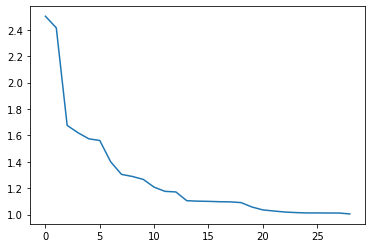

In [118]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html

nv = 29
a = 5
m = 1

s = (np.random.pareto(a, nv) + 1) * m
print(s)

#plt.plot(s)
#plt.plot(np.sort(s))
plt.plot(np.flip(np.sort(s)))

In [125]:
n_data = 200

# pareto distribution parameters
n_p = 27
a_p = 3
m_p = 1

datamat = np.zeros((len_p,n_data))

for i in range(n_data):
    s = np.sort((np.random.pareto(a_p, n_p) + 1) * m_p)
    datamat[:,i] = s
    
print(np.shape(datamat))
X = np.transpose(datamat)
print(np.shape(X))

(27, 200)
(200, 27)


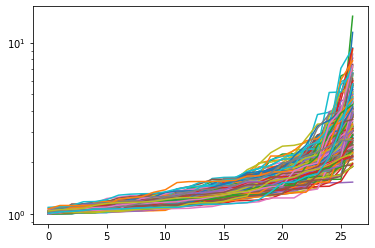

In [126]:
for i in range(n_data):
    #plt.plot(datamat[:,i])
    plt.semilogy(datamat[:,i])


In [127]:
# Run K-means :
# X == shape (n_samples, n_features)

nClusters = 7
kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(X)
clusterlabels = np.squeeze(np.asarray(kmeans.labels_))
centroids = np.asarray(kmeans.cluster_centers_)

print(np.shape(centroids))
print(kmeans)
print(clusterlabels)
print(np.shape(clusterlabels))

(7, 27)
KMeans(n_clusters=7, random_state=0)
[2 0 2 1 5 3 0 1 5 2 3 3 0 3 0 3 3 0 3 3 6 3 4 4 2 0 0 5 5 5 3 0 3 5 0 0 0
 3 2 3 3 3 6 1 5 3 2 3 2 3 2 2 2 5 0 2 5 0 0 2 3 3 0 5 2 3 1 0 1 3 2 3 3 5
 0 3 5 0 3 5 3 0 1 2 5 0 0 3 2 3 1 0 0 5 3 3 3 0 1 4 2 3 0 1 3 3 0 2 5 4 2
 0 5 0 2 1 1 5 0 5 1 3 0 2 1 5 0 5 0 5 3 4 2 2 3 1 2 0 2 3 3 0 5 4 5 1 3 2
 2 3 1 5 3 1 2 3 3 3 4 4 2 3 5 3 5 1 3 3 5 2 3 4 5 0 5 0 2 5 3 4 2 2 0 0 3
 0 5 4 3 2 5 2 2 3 5 5 4 3 0 1]
(200,)


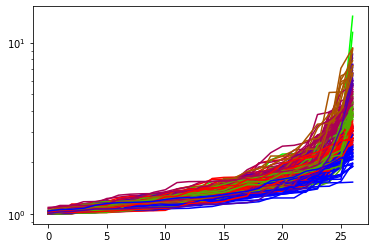

In [128]:
# color by cluster number: 
#colmap = cm.tab20b
colmap = cm.brg
cval = np.linspace(0.0,1.0,nClusters)

for i in range(n_data):
    ind = np.int(clusterlabels[i])
    c = colmap(cval[ind])
    plt.semilogy(X[i,:], color=c)

# for i in range(nClusters):
#     ind = np.int(clusterlabels[i]) 
#     c = colmap(cval[ind])    
#     plt.semilogy(centroids[i,:], color=c)

## Other ways of representing the data: 
PCA <br>
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


In [129]:
pca = PCA(n_components=11)
Xt = np.transpose(X)
pcamat = np.asarray(pca.fit(Xt).components_)
pcamat
print()
print(type(pcamat))
print(np.shape(pcamat))


<class 'numpy.ndarray'>
(11, 200)


Text(0, 0.5, 'principle component 2')

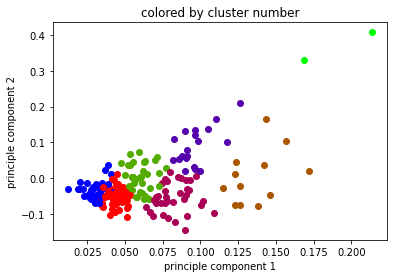

In [130]:
#plt.plot(pcamat[0,:],pcamat[1,:],'o')

for i in range(n_data):
    ind = np.int(clusterlabels[i])
    c = colmap(cval[ind]) 
    plt.plot(pcamat[0,i],pcamat[1,i],'o',color=c)
    
plt.title('colored by cluster number')
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')

## now build in some underlying known statistical variations to the dataset

In [225]:
# different slopes and scalars

def sample_a_b(mu1=.5,mu2=.5,var1=.005,var2=.005,cov=0,n=1000):
    mean = np.array([mu1,mu2])
    cov = np.array([[var1,cov],[cov,var2]])
    sample = np.empty([n,2])
    size = 0
    while size<n:
        x = np.random.multivariate_normal(mean,cov)
        if all(np.logical_and(x>0,x<1)):
            sample[size,:]=x
            size+=1
    return(sample)


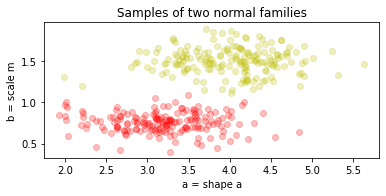

(179, 2) (179, 2)


In [276]:
# parameter tuning here
# mu = mean value of gaussian
# 1 = a_p (the shape parameter)
# 2 = m_p (the scaling parameter)

# Family A
mu1_A = 0.4
mu2_A = 0.4 # 0.6
var1_A = var2_A = .005

# Family B
mu1_B = 0.5
mu2_B = 0.6 #.3
var1_B = var2_B = .005

size = 179

A = sample_a_b(mu1_A,mu2_A,var1_A,var2_A,n=size)
B = sample_a_b(mu1_B,mu2_B,var1_B,var2_B,n=size)

# scale by real ranges: 
a_A = 8
m_A = 1.9
Ar = np.zeros(np.shape(A))
Ar[:,0] = A[:,0]*a_A
Ar[:,1] = A[:,1]*m_A

a_B = 8
m_B = 2.5
Br = np.zeros(np.shape(B))
Br[:,0] = B[:,0]*a_B
Br[:,1] = B[:,1]*m_B


# plotting
plt.axes().set_aspect('equal')
plt.plot(Ar[:,0],Ar[:,1],'ro',alpha=0.25)
plt.plot(Br[:,0],Br[:,1],'yo',alpha=0.25)
# plt.xlim([-0.1,1.1])
# plt.ylim([-0.1,1.1])
plt.xlabel('a = shape a')
plt.ylabel('b = scale m')
plt.title('Samples of two normal families')
# red = mpatches.Patch(color='red', label='Family A')
# yellow = mpatches.Patch(color='y', label='Family B')
# plt.legend(handles=[red, yellow])
plt.show()

print(np.shape(Ar),np.shape(Br))

In [277]:
# now generate the data from the sets of parameters ! 
n_p = 48
n_data = len(Ar)
datamat_A = np.zeros((n_data,n_p))

for i in range(n_data):
    a = Ar[i,0]
    m = Ar[i,1]

    s = np.sort((np.random.pareto(a, n_p) + 1) * m)
    datamat_A[i,:] = s
    
n_data = len(Br)
datamat_B = np.zeros((n_data,n_p))

for i in range(n_data):
    a = Br[i,0]
    m = Br[i,1]

    s = np.sort((np.random.pareto(a, n_p) + 1) * m)
    datamat_B[i,:] = s
    


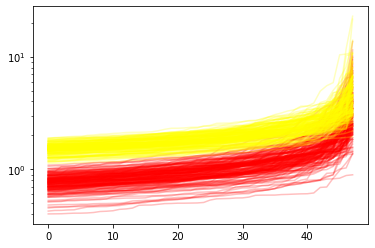

In [278]:
for i in range(len(datamat_A)):
    plt.semilogy(datamat_A[i,:],color='red',alpha=0.25)
for i in range(len(datamat_B)):
    plt.semilogy(datamat_B[i,:],color='yellow',alpha=0.25)

In [279]:
# merge the two families and mix them up randomly
datamat = np.vstack((datamat_A,datamat_B))
print(np.shape(datamat))
print(datamat[0,-1])
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html
np.random.shuffle(datamat)
print(datamat[0,-1])

(358, 48)
2.3440472677250646
4.374747070629183


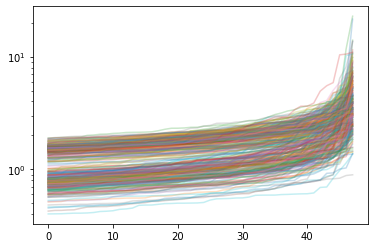

In [280]:
for i in range(len(datamat)):
    plt.semilogy(datamat[i,:],alpha=0.25)

In [281]:
#X = np.transpose(datamat)
X = datamat 
print(np.shape(X))

# Run K-means: 
nClusters = 2
kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(X)
clusterlabels = np.asarray(kmeans.labels_)
centroids = np.asarray(kmeans.cluster_centers_)


print(kmeans)
print(clusterlabels)
print(np.shape(clusterlabels))
print(np.shape(centroids))

(358, 48)
KMeans(n_clusters=2, random_state=0)
[0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1
 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0
 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1]
(358,)
(2, 48)


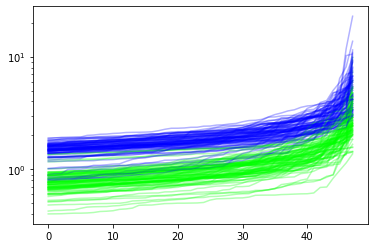

In [282]:
# color by cluster number: 
#colmap = cm.tab20b
colmap = cm.brg
cval = np.linspace(0.0,1.0,nClusters)

for i in range(n_data):
    ind = np.int(clusterlabels[i])
    c = colmap(cval[ind])
    plt.semilogy(X[i,:], color=c,alpha=0.3)


In [283]:
pca = PCA(n_components=3)
Xt = np.transpose(X)
pcamat = np.asarray(pca.fit(Xt).components_)
pcamat
print()
print(type(pcamat))
print(np.shape(pcamat))


<class 'numpy.ndarray'>
(3, 358)


Text(0, 0.5, 'principle component 2')

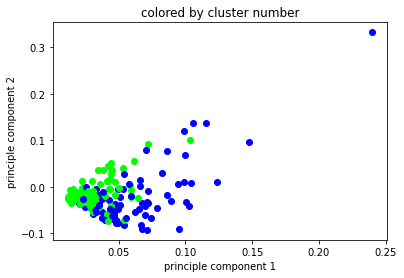

In [284]:
#plt.plot(pcamat[0,:],pcamat[1,:],'o')

for i in range(n_data):
    ind = np.int(clusterlabels[i])
    c = colmap(cval[ind]) 
    plt.plot(pcamat[0,i],pcamat[1,i],'o',color=c)
    
plt.title('colored by cluster number')
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')